In [12]:
#Import libraries
import mne 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [164]:
#Create dictionary with all the data grouped by condition
    
#Create root folder argument for folders to loop through
root_folder = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\Epoched_Data'
os.chdir(root_folder)


DataA = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for folder in os.listdir(root_folder):
    for filename in os.listdir(folder): 
        file_path = os.path.join(folder, filename)
        with open(file_path,'rb') as g:
            raw = pickle.load(g)
        #Get the participant ID
        ID = filename.split('_',maxsplit=1)[0]
        #Get condition
        cond = '_'.join(filename.split('_')[1:-1])
        if 'EC' in cond:
            cond = 'EC'
        elif 'EO' in cond:
            cond = 'EO'
        #Add array element to dictionary
        DataA[cond][ID] = raw.get_data()
nu_fold = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal' 

with open(nu_fold + '\\DataA.pkl', 'wb') as f:
        pickle.dump(DataA, f)
f.close()

In [134]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB_mne.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataB = raw.copy()

In [151]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [20]:
%matplotlib qt

root_folder = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB.pkl"
#Loop through all the data and group the psd by condition, then plot the comparison
psdss = [[0],[0],[0],[0],[0],[0],[0],[0]]
t = 0
for cond in DataA.keys():
    i = 0
    pitstop = list()
    #if cond not in ['INDUCTION','EMERGENCE', 'SED_2', 'SED_3', 'EC', 'EO']:
    for pers in DataB[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataA[cond][pers],sfreq=500)
        pitstop.append(np.mean(np.mean(psds,axis=0),axis=0))
        i += 1
    psdss[t] = [np.mean(pitstop,axis=0)]
    t += 1 

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

In [2]:
import pandas as pd
import math

In [137]:
print(DataB['EO']['SD5001'])
print(DataA['EO']['SD5001'].shape)

<Epochs |  33 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~5.7 MB, data loaded,
 '1': 33>
(33, 63, 351)


In [134]:
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [16]:
#Apply 50hz notch filter
from scipy.signal import butter, filtfilt
import numpy as np

for key in DataA.keys():
    for per in DataA[key].keys():
        data = DataA[key][per]
        
       # Define the filter parameters
        nyquist_freq = 0.5 * 500 # where sample_rate is your sampling frequency
        cutoff_freq = 30  # define your cutoff frequency
        order = 5  # choose the filter order

        # Generate the filter coefficients
        normalized_cutoff = cutoff_freq / nyquist_freq
        b, a = butter(order, normalized_cutoff, btype='lowpass')

        # Apply the notch filter to the data and replace the previous data
        DataA[key][per] = filtfilt(b, a, data)
#Save the new file
with open(os.path.join('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\LowPassedData',"DataA_LowPassed.pkl"), 'wb') as f:
    pickle.dump(DataA, f) 

f.close()


In [4]:
#Convert mne objects to numpy arrays
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_mne_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

#Convert mne objects to numpy arrays by looping through each object and convert to numpy array
DataB = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for key in DataA.keys():
    for per in DataA[key].keys():
        DataB[key][per] = DataA[key][per].get_data()

#Save the new file
with open('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl', 'wb') as f:
    pickle.dump(DataB, f)
f.close()


In [10]:
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

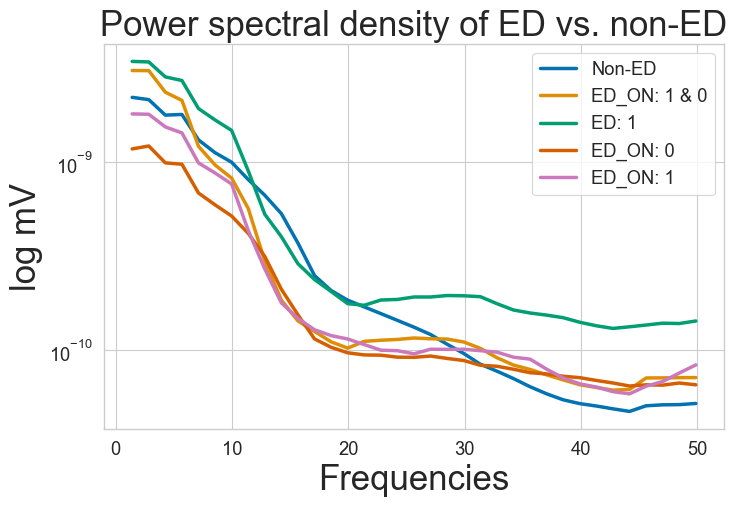

In [13]:
#### Compare ego dissolution vs. non-ego dissolution ####
import math

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if pers == '2001':
            pers = 'Pilot_2001'
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            ON_sum = df.loc[Q_corresp[ket_conds.index(cond)]+1,pers]
            if ED_sum == ED_sum and ON_sum == ON_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if type(ON_sum) == str:
                    ON_sum = int(round(float(ON_sum)))
                else:
                    ON_sum = int(ON_sum)
                if ED_sum == 0 and ON_sum == 0:
                    psdss['ED_ON: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1 and ON_sum == 1:
                    psdss['ED_ON: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
                else:
                    psdss['ED_ON: 1 & 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
            elif ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                psdss['ED: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else: 
            psdss['Non-ED'].append(np.mean(np.mean(psds,axis=0),axis=0))

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(psdss['Non-ED'],axis=0).T),label='Non-ED')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 1 & 0'],axis=0).T),label='ED_ON: 1 & 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED: 1'],axis=0).T),label='ED: 1')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 0'],axis=0).T),label='ED_ON: 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 1'],axis=0).T),label='ED_ON: 1')
plt.yscale('log')
plt.xlabel('Frequencies', size=25)
plt.ylabel('log mV', size=25)
plt.title('Power spectral density of ED vs. non-ED', loc='center', size=25)
plt.legend()
# Resize the figure to a specific size
plt.gcf().set_size_inches(8, 5) # 6 inches by 4 inches

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ed_comparison.png',dpi=300)


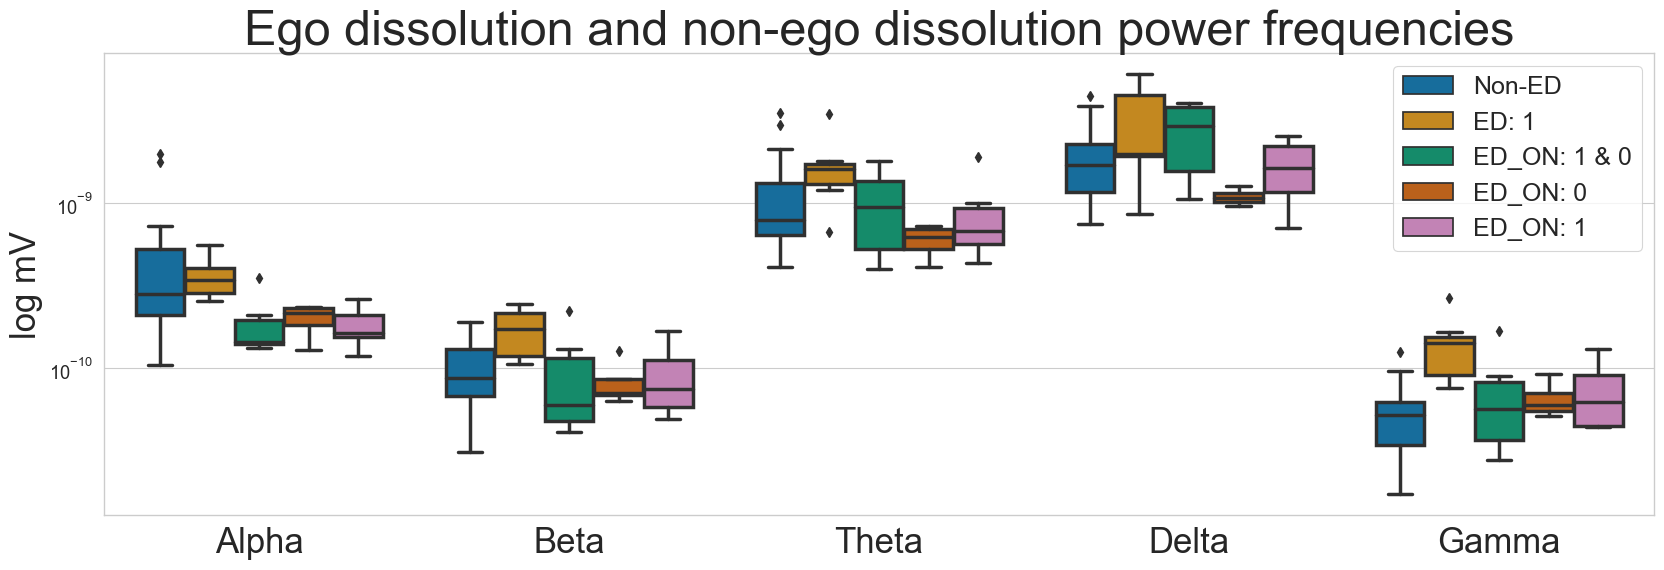

In [14]:
####Create boxplot of ED and non-ED####

#Convert all the frequencies to alpha, beta, theta, delta and gamma
#Alpha: 8-12 Hz
#Beta: 13-30 Hz
#Theta: 4-7 Hz
#Delta: 1-3 Hz
#Gamma: 31-50 Hz


#Create a dictionary with the frequencies
freqs = {'Alpha':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Beta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Theta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Delta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Gamma':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}}
for cond in psdss.keys():
    for psd in psdss[cond]:
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))
# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind")
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=25)
plt.xlabel(None)
plt.yscale('log')
plt.ylabel('log mV', size=25)
plt.legend(loc=(1.01, 0.5))
plt.title('Ego dissolution and non-ego dissolution power frequencies', size=35)
plt.legend(fontsize=18)
# Resize the figure to a specific size
plt.gcf().set_size_inches(20, 6) 
#Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ed_comparison_boxplot.png',dpi=300)
# Show the plot
plt.show()


In [25]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# create a list of group labels
group_labels = ['Non-ED', 'ED: 1', 'ED_ON: 1 & 0', 'ED_ON: 0', 'ED_ON: 1']

fs_ps = list()
for freq in freqs.keys():
    fvalue, pvalue = f_oneway(freqs[freq]['Non-ED'], freqs[freq]['ED: 1'], freqs[freq]['ED_ON: 1 & 0'], freqs[freq]['ED_ON: 0'],freqs[freq]['ED_ON: 1'])
    print('Frequency: ', freq, 'F-value: ', fvalue, 'P-value: ', pvalue)


Frequency:  Alpha F-value:  1.5201366476626155 P-value:  0.21241574766074628
Frequency:  Beta F-value:  3.6252798171678347 P-value:  0.012085828513673447
Frequency:  Theta F-value:  1.8649782111103719 P-value:  0.13315698765489797
Frequency:  Delta F-value:  2.767505019079173 P-value:  0.038602618689412574
Frequency:  Gamma F-value:  7.841938447428183 P-value:  6.953154671138199e-05


In [28]:
#Get degrees of freedom
df1 = len(freqs['Alpha']['Non-ED'])-1
df2 = len(freqs['Alpha']['ED: 1'])-1
df3 = len(freqs['Alpha']['ED_ON: 1 & 0'])-1
df4 = len(freqs['Alpha']['ED_ON: 0'])-1
df5 = len(freqs['Alpha']['ED_ON: 1'])-1

print(df1+df2+df3+df4+df5)

45


In [114]:
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

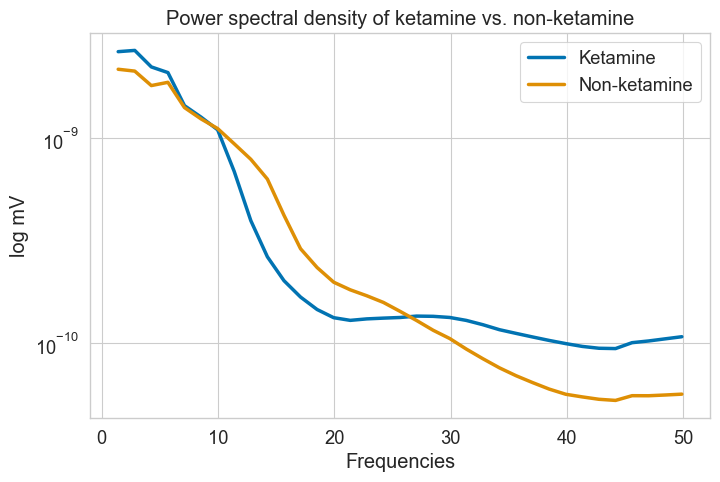

In [86]:
#Psd between ket and non-ket
DataAd = DataA.copy()
#Categorize data by ket or non-ket
Ketictary = {'Ket':[],'No-ket':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            Ketictary['Ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else:
            Ketictary['No-ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
#plot the psd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(Ketictary['Ket'],axis=0).T),label='Ketamine')
sns.lineplot(x=sfreq,y=list(np.mean(Ketictary['No-ket'],axis=0).T),label='Non-ketamine')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.title('Power spectral density of ketamine vs. non-ketamine', loc='center')
plt.legend()
# Resize the figure to a specific size
plt.gcf().set_size_inches(8, 5) # 6 inches by 4 inches

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison.png',dpi=300)

Alpha 0.012130773965211703
Beta 0.38772198132323865
Theta 0.9571471501831837
Delta 0.15336167198271083
Gamma 0.0010630474405553217


C:\Users\andrlm\AppData\Local\Temp\ipykernel_16336\3012697040.py:45: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  y = np.max([max(st.t.interval(alpha=0.95, df=len(group1)-1, loc=statistics.mean(group1), scale=st.sem(group1))), max(st.t.interval(alpha=0.95, df=len(group2)-1, loc=statistics.mean(group2), scale=st.sem(group2)))]) + 0.00000000040


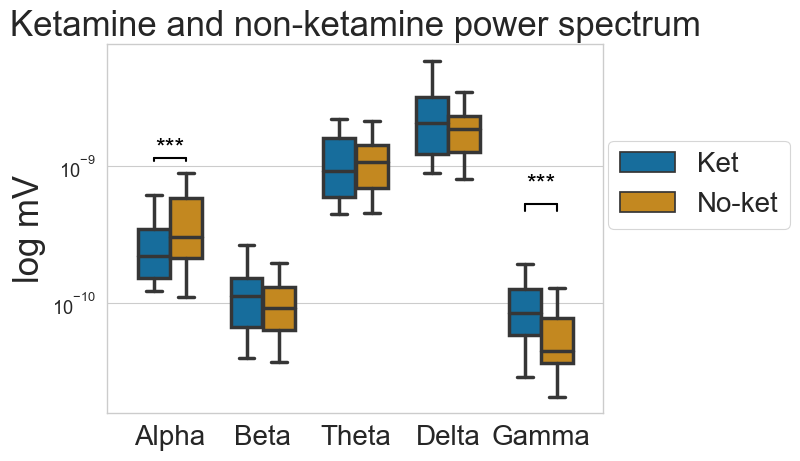

In [113]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import statistics

#Now do the same for the boxplot
#Create a dictionary with the frequencies
freqs = {'Alpha':{'Ket':[], 'No-ket':[]},'Beta':{'Ket':[], 'No-ket':[]},'Theta':{'Ket':[], 'No-ket':[]},'Delta':{'Ket':[], 'No-ket':[]},'Gamma':{'Ket':[], 'No-ket':[]}}
for cond in Ketictary.keys():
    for psd in Ketictary[cond]:
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))

# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind", width=0.7, showfliers=False)
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=20)
plt.xlabel(None)
plt.yscale('log')
plt.ylabel('log mV', size=25)
plt.legend(loc=(1.01, 0.5), fontsize=20)
plt.title('Ketamine and non-ketamine power spectrum', size=25)
# Resize the figure to a specific size

#Calculate significance levels 
#Create loop of checking all possible combinations and calculating the t-test
ys = list()
i = 0
for key in freqs.keys():
    group1, group2 = freqs[key]['Ket'], freqs[key]['No-ket']
    t, p = ttest_ind(group1, group2)
    # add significance lines if p-value is significant
    print(key, p)
    if p < 0.05:
        # calculate y position for the line
        y = np.max([max(st.t.interval(alpha=0.95, df=len(group1)-1, loc=statistics.mean(group1), scale=st.sem(group1))), max(st.t.interval(alpha=0.95, df=len(group2)-1, loc=statistics.mean(group2), scale=st.sem(group2)))]) + 0.00000000040
        # add line with asterisks indicating significance level
        plt.plot([i-0.175, i+0.175], [y, y], lw=1.5, c='k')
        plt.plot([i-0.175, i-0.175], [y, y - 0.00000000006], lw=1.5, c='k')
        plt.plot([i+0.175,i+0.175], [y, y - 0.00000000006], lw=1.5, c='k')
        plt.text(i, y + 0.0000000002, "***", ha='center', va='center', color='k', fontsize=18)
    i += 1

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison_boxplot.png',dpi=300)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

C:\Users\andrlm\AppData\Local\Temp\ipykernel_16336\1884288576.py:63: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  y = np.max([max(st.t.interval(alpha=0.95, df=len(group1)-1, loc=statistics.mean(group1), scale=st.sem(group1))), max(st.t.interval(alpha=0.95, df=len(group2)-1, loc=statistics.mean(group2), scale=st.sem(group2)))]) + 0.00000000040


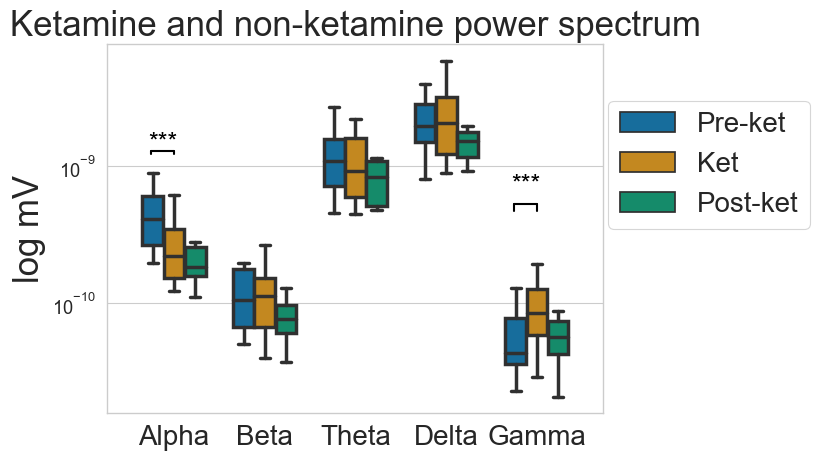

In [131]:
#Same as above, but with pre-ket, ket and post-ket

#Psd between pre-ket, ket and post-ket
DataAd = DataA.copy()
#Categorize data by ket or non-ket
Ketictary2 = {'Pre-ket':[],'Ket':[],'Post-ket':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            Ketictary2['Ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
        elif cond == 'EO' or cond == 'EC' or cond == 'INDUCTION':
            Ketictary2['Pre-ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else:
            Ketictary2['Post-ket'].append(np.mean(np.mean(psds,axis=0),axis=0))

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import statistics

#Now do the same for the boxplot
#Create a dictionary with the frequencies
freqs = {'Alpha':{'Pre-ket':[], 'Ket':[], 'Post-ket':[]},'Beta':{'Pre-ket':[], 'Ket':[], 'Post-ket':[]},'Theta':{'Pre-ket':[], 'Ket':[], 'Post-ket':[]},'Delta':{'Pre-ket':[], 'Ket':[], 'Post-ket':[]},'Gamma':{'Pre-ket':[], 'Ket':[], 'Post-ket':[]}}
for cond in Ketictary2.keys():
    for psd in Ketictary2[cond]:
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))

# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind", width=0.7, showfliers=False)
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=20)
plt.xlabel(None)
plt.ylabel('log mV', size=25)
plt.legend(loc=(1.01, 0.5), fontsize=20)
plt.title('Ketamine and non-ketamine power spectrum', size=25)
# Resize the figure to a specific size

#Calculate significance levels 
#Create loop of checking all possible combinations and calculating the t-test
keys_ = ['Pre-ket','Ket','Post-ket']
ys = list()
i = 0
for key in freqs.keys():
    for subkey in range(0,len(keys_)-1):
        for subkey2 in range(subkey+1,len(keys_)): 
            group1, group2 = freqs[key][keys_[subkey]], freqs[key][keys_[subkey2]]
            t, p = ttest_ind(group1, group2)
            # add significance lines if p-value is significant
            print(key, keys_[subkey],keys_[subkey2], p)
            if p < 0.05:
                # calculate y position for the line
                y = np.max([max(st.t.interval(alpha=0.95, df=len(group1)-1, loc=statistics.mean(group1), scale=st.sem(group1))), max(st.t.interval(alpha=0.95, df=len(group2)-1, loc=statistics.mean(group2), scale=st.sem(group2)))]) + 0.00000000040
                # add line with asterisks indicating significance level
                plt.plot([i-0.25, i], [y, y], lw=1.5, c='k')
                plt.plot([i-0.25, i-0.25], [y, y - 0.00000000006], lw=1.5, c='k')
                plt.plot([i,i], [y, y - 0.00000000006], lw=1.5, c='k')
                plt.text(i-0.125, y + 0.0000000002, "***", ha='center', va='center', color='k', fontsize=18)
    i += 1
plt.yscale('log')
# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison_boxplot_seq.png',dpi=300)

In [90]:
#### Compare ego dissolution vs. non-ego dissolution ####
import math

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if pers == '2001':
            pers = 'Pilot_2001'
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            ON_sum = df.loc[Q_corresp[ket_conds.index(cond)]+1,pers]
            if ED_sum == ED_sum and ON_sum == ON_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if type(ON_sum) == str:
                    ON_sum = int(round(float(ON_sum)))
                else:
                    ON_sum = int(ON_sum)
                if ED_sum == 0 and ON_sum == 0:
                    psdss['ED_ON: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1 and ON_sum == 1:
                    psdss['ED_ON: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
                else:
                    psdss['ED_ON: 1 & 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
            elif ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                psdss['ED: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else: 
            psdss['Non-ED'].append(np.mean(np.mean(psds,axis=0),axis=0))

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

C:\Users\andrlm\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\andrlm\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


In [20]:
#Calculate Lempel-Ziv complexity to compare between ket and non-ket
import pyconscious as pyc
from statistics import mean

#Loop through the data and calculate LZC
def calculate_lz(array):
    # Calculate the Lempel-Ziv complexity using pyconscious
    return pyc.LZc(array,ea="raw")

LZC = {'Ket':[],'EC':[],'EO':[],'EMERGENCE':[]}
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond == 'SED_1':
            if pers != '2001':
                LZC['Ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['SED_2'][pers]),pyc.LZc(DataA['SED_3'][pers]),pyc.LZc(DataA['SED_4'][pers])]))
            else:
                LZC['Ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['SED_2'][pers]),pyc.LZc(DataA['SED_3'][pers])]))
        elif cond == 'EC' or cond == 'EO' or cond == 'EMERGENCE':
            LZC[cond].append(pyc.LZc(DataA[cond][pers]))


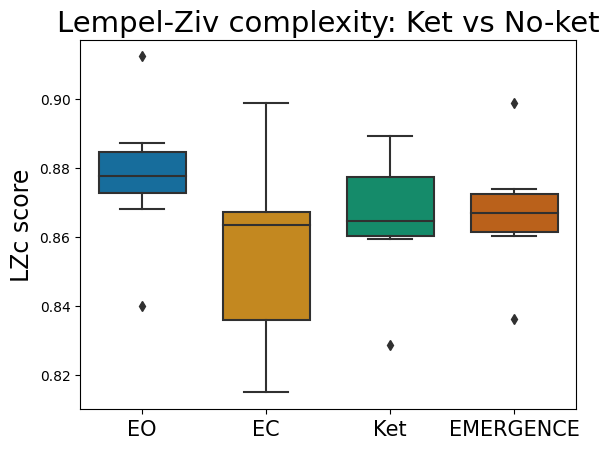

In [26]:
#Plot the LZC for each condition
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the dictionary to a short-form dataframe
df = pd.DataFrame([(k1, x) for k1,v1 in LZC.items() for x in v1], columns=['Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Condition', y='Value', data=df, palette="colorblind", width=0.7, order=["EO", "EC", "Ket", "EMERGENCE"])
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel(None)
plt.ylabel('LZc score', size=17)
plt.title('Lempel-Ziv complexity: Ket vs No-ket', size=21)

#Create loop of checking all possible combinations and calculating the t-test
g = ['EO','EC','Ket','EMERGENCE']
ys = list()
for i in range(0,len(g)-1):
    for j in range(i+1,len(g)):
        group1, group2 = LZC[g[i]], LZC[g[j]]
        t, p = ttest_ind(group1, group2)
        # add significance lines if p-value is significant
        if p < 0.05:
            # calculate y position for the line
            y = np.max([max(group1), max(group2)]) + 0.015
            if y in ys:
                y += 0.015
            else:
                ys.append(y)
            # add line with asterisks indicating significance level
            plt.plot([i, j], [y, y], lw=1.5, c='k')
            plt.plot([i,i], [y, y - 0.006], lw=1.5, c='k')
            plt.plot([j,j], [y, y - 0.006], lw=1.5, c='k')
            plt.text(i+(j-i)/2, y + 0.002, "***", ha='center', va='center', color='k', fontsize=18)
# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ket_comparison_boxplot_fixed_sig.png',dpi=300)
plt.show()

In [ ]:
#Convert df long dataframe to wide dataframe
df = df.set_index([df.groupby('Condition').cumcount(), 'Condition'])['Value'].unstack()

C:\Users\andrlm\AppData\Local\Temp\ipykernel_16336\3875361487.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [df['EC'], df['Ket']], 'k-',alpha=0.9, color="grey", lw=0.99)


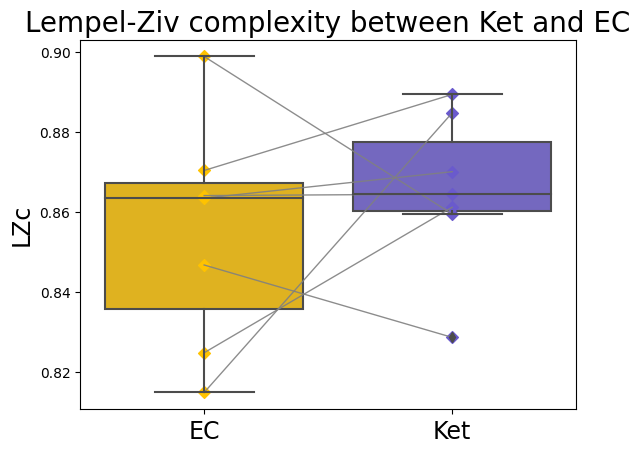

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Connect the points between Ket and EC with lines
plt.scatter([1]*len(df['Ket']), df['Ket'], label='Ket', color="#6A5ACD", marker="D")
plt.scatter([0]*len(df['EC']), df['EC'], label='EC', color="#FFC300", marker="D")
plt.plot([0, 1], [df['EC'], df['Ket']], 'k-',alpha=0.9, color="grey", lw=0.99)
plt.xticks([0, 1], ['EC', 'Ket'], size=17)
plt.ylabel('LZc', size=17)
plt.title('Lempel-Ziv complexity between Ket and EC', size=20)

# Create a boxplot for the Ket and EC groups
df=df.reindex(columns=['EC', 'Ket'])
sns.boxplot(data=df, palette=["#FFC300", "#6A5ACD"])

# create two subgroups
group1 = LZC['EC']
group2 = LZC['Ket']

# perform t-test
t, p = ttest_ind(group1, group2)

# add significance lines if p-value is significant
if p < 0.05:
    # calculate y position for the line
    y = np.max([max(group1), max(group2)]) + 0.021
    # add line with asterisks indicating significance level
    plt.ylim(0.80,0.93)
    plt.plot([0, 1], [y, y], lw=1.5, c='k')
    plt.plot([0,0], [y, y - 0.004], lw=1.5, c='k')
    plt.plot([1,1], [y, y - 0.004], lw=1.5, c='k')
    plt.text(0.5, y + 0.002, "***", ha='center', va='center', color='k', fontsize=18)


plt.xlabel(None)
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ket_comparison_boxplot_subjects_dotpoints.png',dpi=300)
plt.show()

In [33]:
#The same as above, just in general LZc between ket and non-ket
import pyconscious as pyc
from statistics import mean

#Loop through the data and calculate LZC
def calculate_lz(array):
    # Calculate the Lempel-Ziv complexity using pyconscious
    return pyc.LZc(array,ea="raw")

LZC3 = {'Ket':[],'Non-ket':[]}
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond == 'SED_1':
            if pers != '2001':
                LZC3['Ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['SED_2'][pers]),pyc.LZc(DataA['SED_3'][pers]),pyc.LZc(DataA['SED_4'][pers])]))
            else:
                LZC3['Ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['SED_2'][pers]),pyc.LZc(DataA['SED_3'][pers])]))
        elif cond == 'EC':
            if pers != 'SD5008':
                LZC3['Non-ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['EO'][pers]),pyc.LZc(DataA['EMERGENCE'][pers])]))
            else:
                LZC3['Non-ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['EO'][pers])]))

In [34]:
# Convert the dictionary to a short-form dataframe
df = pd.DataFrame([(k1, x) for k1,v1 in LZC3.items() for x in v1], columns=['Condition', 'Value'])
#Convert df long dataframe to wide dataframe
df = df.set_index([df.groupby('Condition').cumcount(), 'Condition'])['Value'].unstack()

C:\Users\andrlm\AppData\Local\Temp\ipykernel_16336\2214799153.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [df['Non-ket'], df['Ket']], 'k-',alpha=0.9, color="grey", lw=0.99)


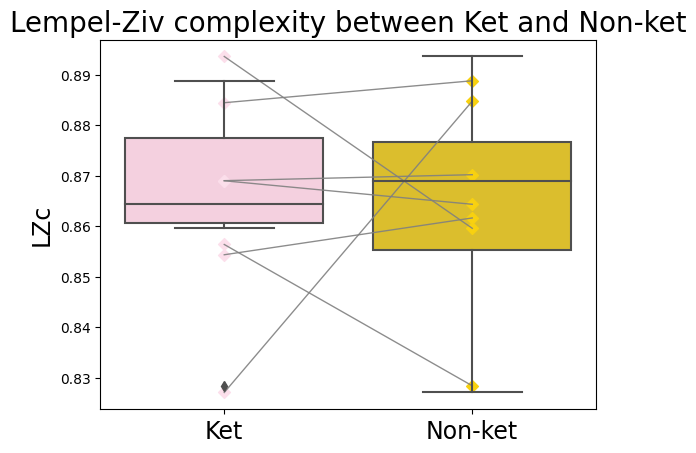

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Connect the points between Ket and EC with lines
plt.scatter([1]*len(df['Ket']), df['Ket'], label='Ket', color="#f8d110", marker="D")
plt.scatter([0]*len(df['Non-ket']), df['Non-ket'], label='No-ket', color="#fcdfeb", marker="D")
plt.plot([0, 1], [df['Non-ket'], df['Ket']], 'k-',alpha=0.9, color="grey", lw=0.99)
plt.xticks([0, 1], ['Non-ket', 'Ket'], size=17)
plt.ylabel('LZc', size=17)
plt.title('Lempel-Ziv complexity between Ket and Non-ket', size=20)

# Create a boxplot for the Ket and EC groups
sns.boxplot(data=df, palette=["#FACADE", "#f8d110"])

# create two subgroups
group1 = LZC['Non-ket']
group2 = LZC['Ket']

# perform t-test
t, p = ttest_ind(group1, group2)

# add significance lines if p-value is significant
if p < 0.05:
    # calculate y position for the line
    y = np.max([max(group1), max(group2)]) + 0.021
    # add line with asterisks indicating significance level
    plt.ylim(0.80,0.93)
    plt.plot([0, 1], [y, y], lw=1.5, c='k')
    plt.plot([0,0], [y, y - 0.004], lw=1.5, c='k')
    plt.plot([1,1], [y, y - 0.004], lw=1.5, c='k')
    plt.text(0.5, y + 0.002, "***", ha='center', va='center', color='k', fontsize=18)


plt.xlabel(None)
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ket_comparison_boxplot_subjects_dotpoints_ket_no_ket.png',dpi=300)
plt.show()

In [40]:
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [66]:
#### Calculate LZc for all data and categorize into ED and non-ED ####

#Calculate Lempel-Ziv complexity to compare between ket and non-ket
import pyconscious as pyc
import pandas as pd

df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")

#Shorten all epochs to the last minute of recording
for cond in DataA.keys():
    for pers in DataA[cond].keys():
        DataA[cond][pers] = DataA[cond][pers][-7:-1]

LZC2 = {'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]

#Change 2001 label '2001'
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
# Rename column 'B' to 'B_new' and change its data type to string
df = df.rename(columns={2001: '2001'})

#Categorize into ED and non-ED
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond in ket_conds:
            if pers == '2001':
                pers = 'Pilot_2001'
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            ON_sum = df.loc[Q_corresp[ket_conds.index(cond)]+1,pers]
            if pers == 'Pilot_2001':
                pers = '2001'
            if ED_sum == ED_sum and ON_sum == ON_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if type(ON_sum) == str:
                    ON_sum = int(round(float(ON_sum)))
                else:
                    ON_sum = int(ON_sum)
                if ED_sum == 0 and ON_sum == 0:
                    LZC2['ED_ON: 0'].append(pyc.LZc(DataA[cond][pers]))
                elif ED_sum == 1 and ON_sum == 1:
                    LZC2['ED_ON: 1'].append(pyc.LZc(DataA[cond][pers]))
                else:
                    LZC2['ED_ON: 1 & 0'].append(pyc.LZc(DataA[cond][pers]))
            elif ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                LZC2['ED: 1'].append(pyc.LZc(DataA[cond][pers]))
        else: 
            LZC2['Non-ED'].append(pyc.LZc(DataA[cond][pers]))



In [67]:
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(LZC2, orient='index')

# Transpose the DataFrame
df = df.transpose()

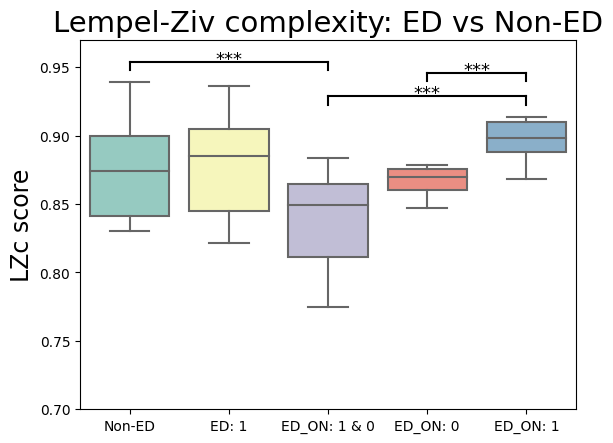

In [78]:
#Plot the LZC for each condition
from scipy.stats import ttest_ind
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

#Convert dictionary to pandas dataframe
df = pd.DataFrame([(k1, x) for k1,v1 in LZC2.items() for x in v1], columns=['Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Condition', y='Value', data=df, palette='Set3')
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xlabel(None)
plt.ylabel('LZc score', size=17)
plt.title('Lempel-Ziv complexity: ED vs Non-ED', size=21)

#Create loop of checking all possible combinations and calculating the t-test
ys = list()
#Convert df long dataframe to wide dataframe
df = df.set_index([df.groupby('Condition').cumcount(), 'Condition'])['Value'].unstack()
#Create loop of checking all possible combinations and calculating the t-test
g = ['Non-ED', 'ED: 1', 'ED_ON: 1 & 0', 'ED_ON: 0', 'ED_ON: 1']
for i in range(0,len(g)-1):
    for j in range(i+1,len(g)):
        group1, group2 = list(df[g[i]]), list(df[g[j]])
        group1 = [x for x in group1 if not math.isnan(x)]
        group2 = [x for x in group2 if not math.isnan(x)]
        t, p = ttest_ind(group1, group2)
        # add significance lines if p-value is significant
        if p < 0.05:
            # calculate y position for the line
            y = np.max([max(group1), max(group2)]) + 0.015
            if y in ys:
                y += 0.017
            else:
                ys.append(y)
            # add line with asterisks indicating significance level
            plt.plot([i, j], [y, y], lw=1.5, c='k')
            plt.plot([i,i], [y, y - 0.006], lw=1.5, c='k')
            plt.plot([j,j], [y, y - 0.006], lw=1.5, c='k')
            plt.text(i+(j-i)/2, y + 0.002, "***", ha='center', va='center', color='k', fontsize=13)
# Save the plot to a file
plt.legend()
plt.ylim(0.7,0.97)
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ED_comparison_boxplot_sig_extended.png',dpi=300)

plt.show()

In [52]:
#### Calculate LZc for all data and categorize into ED and non-ED ####

#Calculate Lempel-Ziv complexity to compare between ket and non-ket
import pyconscious as pyc
import pandas as pd

df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")

#Shorten all epochs to the last minute of recording
for cond in DataA.keys():
    for pers in DataA[cond].keys():
        DataA[cond][pers] = DataA[cond][pers][-7:-1]

LZC2 = {'Non-ED':[], 'ED':[]}
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]

#Change 2001 label '2001'
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
# Rename column 'B' to 'B_new' and change its data type to string
df = df.rename(columns={2001: '2001'})

#Categorize into ED and non-ED
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            if pers == '2001':
                pers = 'Pilot_2001'
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            print(ED_sum)
            if pers == 'Pilot_2001':
                pers = '2001'
            if ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if ED_sum == 0:
                    LZC2['Non-ED'].append(pyc.LZc(DataA[cond][pers]))
                elif ED_sum == 1:
                    LZC2['ED'].append(pyc.LZc(DataA[cond][pers]))
        else: 
            LZC2['Non-ED'].append(pyc.LZc(DataA[cond][pers]))

1
nan
1
1
1
1
0.2
1
1
1
0.7
1
1
0.3
nan
1
1
1
0.5
1
0.2
1
1
nan
nan
1
1


In [54]:
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(LZC2, orient='index')

# Transpose the DataFrame
df = df.transpose()

print(df)

      Non-ED        ED
0   0.940913  0.864807
1   0.879680  0.778519
2   0.834178  0.842035
3   0.878026  0.903119
4   0.848461  0.861885
5   0.897648  0.879614
6   0.858200  0.888542
7   0.921022  0.870370
8   0.891469  0.797702
9   0.880100  0.880516
10  0.851123  0.884016
11  0.816959  0.905411
12  0.862744  0.847530
13  0.865587  0.800975
14  0.902610  0.869591
15  0.863654  0.933139
16  0.876218  0.895947
17  0.881226  0.882456
18  0.847530  0.881631
19  0.850604       NaN
20  0.873391       NaN
21  0.857254       NaN
22  0.858846       NaN
23  0.868472       NaN
24  0.835594       NaN
25  0.842614       NaN
26  0.916100       NaN
27  0.882112       NaN
28  0.848697       NaN
29  0.874366       NaN
30  0.888238       NaN


0.6674177358784272


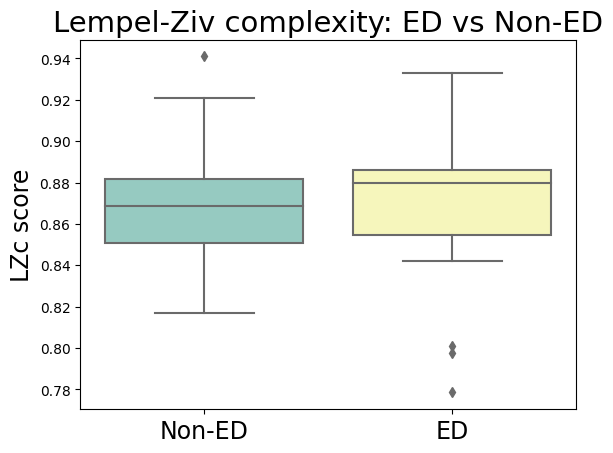

In [65]:
#Plot the LZC for each condition
from scipy.stats import ttest_ind
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

#Convert dictionary to pandas dataframe
df = pd.DataFrame([(k1, x) for k1,v1 in LZC2.items() for x in v1], columns=['Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Condition', y='Value', data=df, palette='Set3')
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=17)
plt.xlabel(None)
plt.ylabel('LZc score', size=17)
plt.title('Lempel-Ziv complexity: ED vs Non-ED', size=21)

#Create loop of checking all possible combinations and calculating the t-test
ys = list()
#Convert df long dataframe to wide dataframe
df = df.set_index([df.groupby('Condition').cumcount(), 'Condition'])['Value'].unstack()
group1, group2 = list(df['Non-ED']), list(df['ED'])
group2 = [x for x in group2 if not math.isnan(x)]
t, p = ttest_ind(group1, group2)
print(p)
# add significance lines if p-value is significant
if p < 0.05:
    # calculate y position for the line
    y = np.max([max(group1), max(group2)]) + 0.015
    if y in ys:
        y += 0.015
    else:
        ys.append(y)
    # add line with asterisks indicating significance level
    plt.plot([i, j], [y, y], lw=1.5, c='k')
    plt.plot([i,i], [y, y - 0.006], lw=1.5, c='k')
    plt.plot([j,j], [y, y - 0.006], lw=1.5, c='k')
    plt.text(i+(j-i)/2, y + 0.002, "***", ha='center', va='center', color='k', fontsize=18)
# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ED_comparison_boxplot_fixed_sig.png',dpi=300)

plt.show()

In [ ]:
# Develop a binary classification algorithm to predict ED status based on EEG data

#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Create a dataframe with all the data

import pandas as pd

df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")

#Shorten all epochs to the last minute of recording
for cond in DataA.keys():
    for pers in DataA[cond].keys():
        DataA[cond][pers] = DataA[cond][pers][-7:-1]

LZC2 = {'Non-ED':[], 'ED':[]}
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]

#Change 2001 label '2001'
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
# Rename column 'B' to 'B_new' and change its data type to string
df = df.rename(columns={2001: '2001'})

#Categorize into ED and non-ED
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            if pers == '2001':
                pers = 'Pilot_2001'
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            print(ED_sum)
            if pers == 'Pilot_2001':
                pers = '2001'
            if ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if ED_sum == 0:
                    LZC2['Non-ED'].append(pyc.LZc(DataA[cond][pers]))
                elif ED_sum == 1:
                    LZC2['ED'].append(pyc.LZc(DataA[cond][pers]))
        else: 
            LZC2['Non-ED'].append(pyc.LZc(DataA[cond][pers]))
#Reduce the number of dimensions using PCA

#Split the data into training and test sets

#Scale the data

#Train the model

#Make predictions and evaluate performance

#Plot the ROC curve

#Plot the confusion matrix

#Plot the classification report

In [1]:
import pickle
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [2]:
#Shorten all epochs to the last minute of recording
for cond in DataA.keys():
    for pers in DataA[cond].keys():
        DataA[cond][pers] = DataA[cond][pers][-7:-1]
        print(pers,cond)
        print(DataA[cond][pers].shape)

2001 EO
(6, 63, 351)
SD5001 EO
(6, 63, 351)
SD5002 EO
(6, 63, 351)
SD5007 EO
(6, 63, 351)
SD5008 EO
(6, 63, 351)
SD5009 EO
(6, 63, 351)
SD5010 EO
(6, 63, 351)
2001 EC
(6, 63, 351)
SD5001 EC
(6, 63, 351)
SD5002 EC
(6, 63, 351)
SD5007 EC
(6, 63, 351)
SD5008 EC
(6, 63, 351)
SD5009 EC
(6, 63, 351)
SD5010 EC
(6, 63, 351)
2001 INDUCTION
(6, 63, 351)
SD5001 INDUCTION
(6, 63, 351)
SD5002 INDUCTION
(6, 63, 351)
SD5007 INDUCTION
(6, 63, 351)
SD5008 INDUCTION
(6, 63, 351)
SD5009 INDUCTION
(6, 63, 351)
SD5010 INDUCTION
(6, 63, 351)
2001 SED_1
(6, 63, 351)
SD5001 SED_1
(6, 63, 351)
SD5002 SED_1
(6, 63, 351)
SD5007 SED_1
(6, 63, 351)
SD5008 SED_1
(6, 63, 351)
SD5009 SED_1
(6, 63, 351)
SD5010 SED_1
(6, 63, 351)
2001 SED_2
(6, 63, 351)
SD5001 SED_2
(6, 63, 351)
SD5002 SED_2
(6, 63, 351)
SD5007 SED_2
(6, 63, 351)
SD5008 SED_2
(6, 63, 351)
SD5009 SED_2
(6, 63, 351)
SD5010 SED_2
(6, 63, 351)
2001 SED_3
(6, 63, 351)
SD5001 SED_3
(6, 63, 351)
SD5002 SED_3
(6, 63, 351)
SD5007 SED_3
(6, 63, 351)
SD5008 SED_3

In [8]:
import pandas as pd
import numpy as np
#Reduce each pers and cond to a single value
LZC2 = {'value':[], 'label:':[]}
Q_corresp = [91,98,105,112]

df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")

for cond in DataA.keys():
    for pers in DataA[cond].keys():
        LZC2['value'].append(np.mean(np.mean(np.mean(DataA[cond][pers],axis=0),axis=0),axis=0))
        if pers == '2001':
            pers = 'Pilot_2001'
        ED_sum = df.loc[Q_corresp[cond],pers]
        if pers == 'Pilot_2001':
            pers = '2001'
        if ED_sum == ED_sum:
            if type(ED_sum) == str:
                ED_sum = int(round(float(ED_sum)))
            else:
                ED_sum = int(ED_sum)
            LZC2['label'].append(ED_sum)
        else:
            LZC2['label'].append(0)


TypeError: list indices must be integers or slices, not str

In [6]:
d = {'d':[]}
d['d'].append(1)
print(d['d'])

[1]
